# &#x1F4D1; &nbsp;  $\mathfrak {\color{#348ABD} {P5: \ Build \ a \ Digit \ Recognition \ Program}}$

----
## $\mathfrak {\color{#348ABD} {Code \ Library \ and \ Links}}$

Multi-dimensional image processing https://docs.scipy.org/doc/scipy/reference/ndimage.html

Keras: Deep Learning library for Theano and TensorFlow https://keras.io/
 
Deep MNIST for Experts https://www.tensorflow.org/get_started/mnist/pros

Tensorflow Deep MNIST Advanced Tutorial http://docs.seldon.io/tensorflow-deep-mnist-example.html

Handwritten Digit Recognition using Convolutional Neural Networks in Python with Keras

http://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

In [3]:
from IPython.core.display import HTML
hide_code = ''
HTML('''<script>code_show = true; 
function code_display() {
    if (code_show) {
        $('div.input').each(function(id) {
            if (id == 0 || $(this).html().indexOf('hide_code') > -1) {$(this).hide();}
        });
        $('div.output_prompt').css('opacity', 0);
    } else {
        $('div.input').each(function(id) {$(this).show();});
        $('div.output_prompt').css('opacity', 1);
    }
    code_show = !code_show;
} 
$(document).ready(code_display);</script>
<form action="javascript: code_display()"><input style="color: #348ABD; background: ghostwhite; opacity: 0.9; " \
type="submit" value="Click to display or hide code"></form>''')

In [4]:
hide_code

import numpy as np
import scipy as sp
import scipy.ndimage
from scipy.special import expit
from time import time

import os
import sys
import h5py
import tarfile

from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

from IPython.display import display, Image, IFrame
import matplotlib.pylab as plt
import matplotlib.cm as cm
from matplotlib import offsetbox
%matplotlib inline

In [5]:
hide_code

import tensorflow as tf
import tensorflow.examples.tutorials.mnist as mnist

In [6]:
hide_code

from sklearn.neural_network import MLPClassifier, BernoulliRBM
from sklearn import linear_model, datasets, metrics
from sklearn.pipeline import Pipeline
from sklearn import manifold, decomposition, ensemble
from sklearn import discriminant_analysis, random_projection
from sklearn.model_selection import train_test_split

In [7]:
hide_code

import keras as ks
from keras.models import Sequential, load_model
from keras.preprocessing import sequence
from keras.optimizers import SGD, RMSprop
from keras.layers import Dense, Dropout, LSTM
from keras.layers import Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D
from keras.layers.embeddings import Embedding

Using TensorFlow backend.


----
## $\mathfrak {\color{#348ABD} {Experimental \ Datasets}}$

#### Dataset #1. Scikit-learn. Digits.

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [8]:
hide_code

digits = datasets.load_digits(n_class=10)
X, y = digits.data, digits.target
print('The second dataset')
print("Shape of the features - {}; shape of the target - {}".format(X.shape, y.shape))

The second dataset
Shape of the features - (1797, 64); shape of the target - (1797,)


In [9]:
hide_code

y_cat = ks.utils.to_categorical(y, num_classes=10)
print('One-hot encoding for y:\n', y_cat)

One-hot encoding for y:
 [[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  1.  0.]]


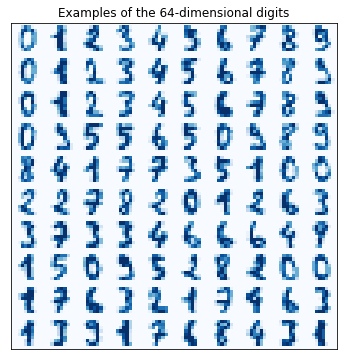

In [10]:
hide_code

img = np.zeros((100, 100))
for i in range(10):
    ix = 10 * i + 1
    for j in range(10):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * 10 + j].reshape((8, 8))

plt.figure(figsize=(6,6))
plt.imshow(img, cmap=plt.cm.Blues)

plt.xticks([])
plt.yticks([])
plt.title('Examples of the 64-dimensional digits');

In [11]:
hide_code
# http://scikit-learn.org/stable/auto_examples/manifold/
# plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py

def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(15,10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

Computing t-SNE embedding


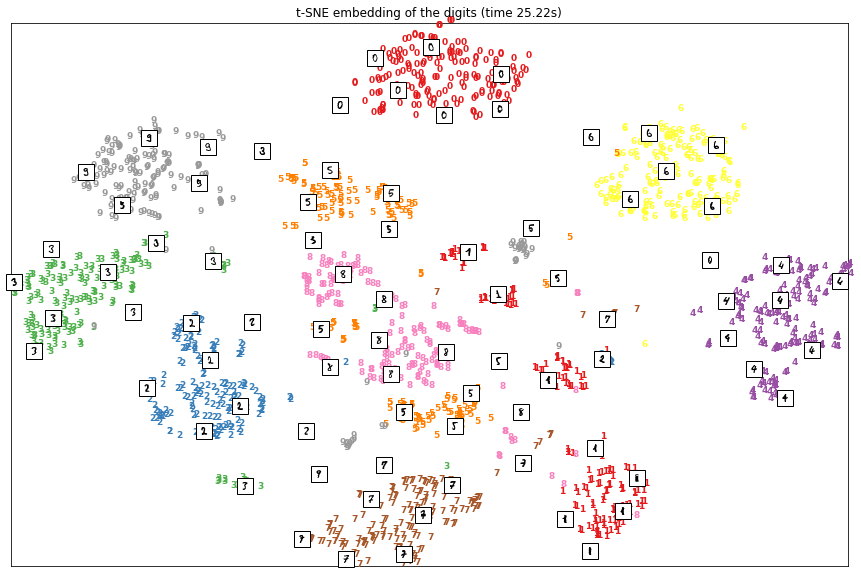

In [12]:
hide_code

# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne, "t-SNE embedding of the digits (time %.2fs)" % (time() - t0))

#### Dataset #2. MNIST 

https://www.tensorflow.org/api_docs/python/tf/contrib/keras/datasets/mnist/load_data

In [13]:
hide_code

mnist_data = mnist.input_data.read_data_sets("MNIST_data/", one_hot=True)
train_images = mnist_data.train.images
train_labels = mnist_data.train.labels
test_images = mnist_data.test.images
test_labels = mnist_data.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [14]:
hide_code

print('The first dataset')
print("Shape of the train features - {}, shape of the train target - {}".\
      format(train_images.shape, train_labels.shape))
print("Shape of the test features - {}, shape of the test target - {}".\
      format(test_images.shape, test_labels.shape))

The first dataset
Shape of the train features - (55000, 784), shape of the train target - (55000, 10)
Shape of the test features - (10000, 784), shape of the test target - (10000, 10)


In [15]:
hide_code

print('Reshape features and targets')
# reshape as [samples][width][height]
train_images28 = np.array([np.reshape(x, (28,28)) for x in train_images])
test_images28 = np.array([np.reshape(x, (28,28)) for x in test_images])
# reshape as [samples][pixels][width][height]
train_images_n28 = train_images.reshape(train_images.shape[0], 1, 28, 28).astype('float32')
test_images_n28 = test_images.reshape(test_images.shape[0], 1, 28, 28).astype('float32')
# reshape labels
train_labels2 = np.array([ np.where(r==1)[0][0] for r in train_labels ])
test_labels2 = np.array([ np.where(r==1)[0][0] for r in test_labels ])

Reshape features and targets


In [16]:
train_images28.shape

(55000, 28, 28)

In [17]:
train_images_n28.shape

(55000, 1, 28, 28)

In [18]:
train_labels.shape

(55000, 10)

In [19]:
train_labels2.shape

(55000,)

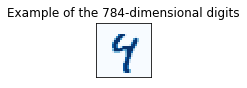

In [20]:
hide_code

plt.figure(figsize=(1,1))
plt.imshow(train_images28[2], cmap=plt.cm.Blues)
plt.xticks([])
plt.yticks([])
plt.title('Example of the 784-dimensional digits');

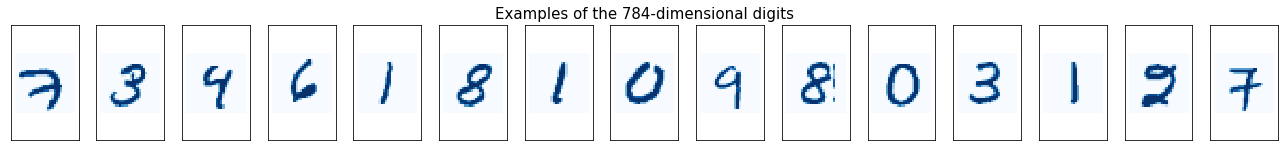

In [21]:
hide_code

fig, ax = plt.subplots(figsize=(18, 2), nrows=1, ncols=15, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(15):
    image = train_images28[i]
    ax[i].imshow(image, cmap=plt.cm.Blues)

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.gcf()
ax[7].set_title('Examples of the 784-dimensional digits', fontsize=15);

#### Dataset #3. Stanford.edu. Housenumbers

http://ufldl.stanford.edu/housenumbers/

In [22]:
hide_code

url = 'http://ufldl.stanford.edu/housenumbers/'
last_percent_reported = None

def download_progress_hook(count, blockSize, totalSize):
    """
    A hook to report the progress of a download. This is mostly intended for users with
    slow internet connections. Reports every 1% change in download progress.
    """
    global last_percent_reported
    percent = int(count * blockSize * 100 / totalSize)

    if last_percent_reported != percent:
        if percent % 5 == 0:
            sys.stdout.write("%s%%" % percent)
            sys.stdout.flush()
        else:
            sys.stdout.write(".")
            sys.stdout.flush()

        last_percent_reported = percent
               
def maybe_download(filename, force=False):
    """
    Download a file if not present, and make sure it's the right size.
    """
    if force or not os.path.exists(filename):
        print('Attempting to download:', filename) 
        filename, _ = urlretrieve(url + filename, filename, reporthook=download_progress_hook)
        print('\nDownload Complete!')
    else:
        print(filename, 'is already downloaded. Skipped.')
    return filename

def maybe_extract(file_, force=False):
    filename = os.path.splitext(os.path.splitext(file_)[0])[0]  # remove .tar.gz
    
    if os.path.isdir(filename) and not force:
        # You may override by setting force=True.
        print('%s is already presented - Skipping extraction of %s.' % (filename, file_))
    else:
        print('Extracting %s file data. Please wait...' % file_)
        tar = tarfile.open(file_)
        sys.stdout.flush()
        tar.extractall()
        tar.close()
        print('File %s is successfully extracted into %s directory.' % (file_, filename))        
    
    return filename

In [23]:
hide_code

train_filename = maybe_download('train.tar.gz')
test_filename = maybe_download('test.tar.gz')
extra_filename = maybe_download('extra.tar.gz')

train.tar.gz is already downloaded. Skipped.
test.tar.gz is already downloaded. Skipped.
extra.tar.gz is already downloaded. Skipped.


In [24]:
hide_code

train_folder = maybe_extract(train_filename)
test_folder = maybe_extract(test_filename)
extra_folder = maybe_extract(extra_filename)

train is already presented - Skipping extraction of train.tar.gz.
test is already presented - Skipping extraction of test.tar.gz.
extra is already presented - Skipping extraction of extra.tar.gz.


#### Dataset #4. Newly-Captured Images

#### Image examples: 
<div style="width: 960px; height: 50px; overflow:auto;">
    <img src="00.png" width="30" height="30"/>
	<img src="01.png" width="30" height="30"/>
	<img src="02.png" width="30" height="30"/>
	<img src="03.png" width="30" height="30"/>
	<img src="04.png" width="30" height="30"/>
	<img src="05.png" width="30" height="30"/>
	<img src="06.png" width="30" height="30"/>
	<img src="07.png" width="30" height="30"/>
	<img src="08.png" width="30" height="30"/>
	<img src="09.png" width="30" height="30"/>
</div>

----
## $\mathfrak {\color{#348ABD} {Step \ 1:\ Design \ and \ Test \ a \ Model \ Architecture}}$
In this project we will design and implement a deep learning model that learns to recognize sequences of digits. Also we will train the model using synthetic data generated by concatenating character images from [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) or [MNIST](http://yann.lecun.com/exdb/mnist/). To produce a synthetic sequence of digits for testing, we can for example limit ourself to sequences up to five digits, and use five classifiers on top of the deep network. We would have to incorporate an additional ‘blank’ character to account for shorter number sequences.

There are various aspects to consider when thinking about this problem:
- The model can be derived from a deep neural net or a convolutional network.
- We could experiment sharing or not the weights between the softmax classifiers.
- We can also use a recurrent network in your deep neural net to replace the classification layers and directly emit the sequence of digits one-at-a-time.

We can use ** Keras ** to implement your model. Read more at [keras.io](https://keras.io/).

Here is an example of a [published baseline model on this problem](http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/42241.pdf). ([video](https://www.youtube.com/watch?v=vGPI_JvLoN0)). You are not expected to model your architecture precisely using this model nor get the same performance levels, but this is more to show an exampe of an approach used to solve this particular problem. We encourage you to try out different architectures for yourself and see what works best for you. Here is a useful [forum post](https://discussions.udacity.com/t/goodfellow-et-al-2013-architecture/202363) discussing the architecture as described in the paper and here is [another one](https://discussions.udacity.com/t/what-loss-function-to-use-for-multi-digit-svhn-training/176897) discussing the loss function.

***Models N1 and N2 are classic examples, models N3, N4 and N5 are designed for this project.***

#### Model #1. https://www.packtpub.com/big-data-and-business-intelligence/python-machine-learning

In [20]:
hide_code

class NeuralNetMLP(object):
    def __init__(self, n_output, n_features, n_hidden=30,
                 l1=0.0, l2=0.0, epochs=500, eta=0.001, 
                 alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1, random_state=None):
        np.random.seed(random_state)
        self.n_output = n_output
        self.n_features = n_features
        self.n_hidden = n_hidden
        self.w1, self.w2 = self._initialize_weights()
        self.l1 = l1
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches

    def _encode_labels(self, y, k):
        onehot = np.zeros((k, y.shape[0]))
        for idx, val in enumerate(y):
            onehot[val, idx] = 1.0
        return onehot

    def _initialize_weights(self):
        w1 = np.random.uniform(-1.0, 1.0, size=self.n_hidden*(self.n_features + 1))
        w1 = w1.reshape(self.n_hidden, self.n_features + 1)
        
        w2 = np.random.uniform(-1.0, 1.0, size=self.n_output*(self.n_hidden + 1))
        w2 = w2.reshape(self.n_output, self.n_hidden + 1)
        
        return w1, w2

    def _sigmoid(self, z):
        # expit is equivalent to 1.0/(1.0 + np.exp(-z))
        return expit(z)

    def _sigmoid_gradient(self, z):
        sg = self._sigmoid(z)
        return sg * (1 - sg)

    def _add_bias_unit(self, X, how='column'):
        if how == 'column':
            X_new = np.ones((X.shape[0], X.shape[1]+1))
            X_new[:, 1:] = X
        elif how == 'row':
            X_new = np.ones((X.shape[0]+1, X.shape[1]))
            X_new[1:, :] = X
        else:
            raise AttributeError('`how` must be `column` or `row`')
        return X_new

    def _feedforward(self, X, w1, w2):
        a1 = self._add_bias_unit(X, how='column')
        z2 = w1.dot(a1.T)
        a2 = self._sigmoid(z2)
        a2 = self._add_bias_unit(a2, how='row')
        z3 = w2.dot(a2)
        a3 = self._sigmoid(z3)
        return a1, z2, a2, z3, a3

    def _L2_reg(self, lambda_, w1, w2):
        return (lambda_/2.0) * (np.sum(w1[:, 1:] ** 2) + np.sum(w2[:, 1:] ** 2))

    def _L1_reg(self, lambda_, w1, w2):
        return (lambda_/2.0) * (np.abs(w1[:, 1:]).sum() + np.abs(w2[:, 1:]).sum())

    def _get_cost(self, y_enc, output, w1, w2):
        term1 = -y_enc * (np.log(output))
        term2 = (1 - y_enc) * np.log(1 - output)
        cost = np.sum(term1 - term2)
        L1_term = self._L1_reg(self.l1, w1, w2)
        L2_term = self._L2_reg(self.l2, w1, w2)
        cost = cost + L1_term + L2_term
        return cost

    def _get_gradient(self, a1, a2, a3, z2, y_enc, w1, w2):
        # backpropagation
        sigma3 = a3 - y_enc
        z2 = self._add_bias_unit(z2, how='row')
        sigma2 = w2.T.dot(sigma3) * self._sigmoid_gradient(z2)
        sigma2 = sigma2[1:, :]
        grad1 = sigma2.dot(a1)
        grad2 = sigma3.dot(a2.T)

        # regularize
        grad1[:, 1:] += (w1[:, 1:] * (self.l1 + self.l2))
        grad2[:, 1:] += (w2[:, 1:] * (self.l1 + self.l2))

        return grad1, grad2

    def predict(self, X):
        a1, z2, a2, z3, a3 = self._feedforward(X, self.w1, self.w2)
        y_pred = np.argmax(z3, axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False):
        self.cost_ = []
        X_data, y_data = X.copy(), y.copy()
        y_enc = self._encode_labels(y, self.n_output)

        delta_w1_prev = np.zeros(self.w1.shape)
        delta_w2_prev = np.zeros(self.w2.shape)

        for i in range(self.epochs):

            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx = np.random.permutation(y_data.shape[0])
                X_data, y_enc = X_data[idx], y_enc[:,idx]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            
            for idx in mini:

                # feedforward
                a1, z2, a2, z3, a3 = self._feedforward(X_data[idx], self.w1, self.w2)
                cost = self._get_cost(y_enc=y_enc[:, idx], output=a3, w1=self.w1, w2=self.w2)
                
                self.cost_.append(cost)

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(a1=a1, a2=a2, a3=a3, z2=z2,
                                                  y_enc=y_enc[:, idx], w1=self.w1, w2=self.w2)

                # update weights
                delta_w1, delta_w2 = self.eta * grad1, self.eta * grad2
                self.w1 -= (delta_w1 + (self.alpha * delta_w1_prev))
                self.w2 -= (delta_w2 + (self.alpha * delta_w2_prev))
                delta_w1_prev, delta_w2_prev = delta_w1, delta_w2

        return self

In [21]:
hide_code

print('Digit dataset. Rows: %d, columns: %d' % (X.shape[0],X.shape[1]))
nn1 = NeuralNetMLP(n_output=10, n_features=X.shape[1], n_hidden=128, 
                  l2=0.1, l1=0.0, epochs=1000, 
                  eta=0.01, alpha=0.01, decrease_const=0.001,
                  shuffle=True, minibatches=128, random_state=0)
nn1.fit(X, y, print_progress=True);

Epoch: 1/1000

Digit dataset. Rows: 1797, columns: 64


Epoch: 1000/1000

In [22]:
hide_code

y_predict = nn1.predict(X)
y_accuracy = np.sum(y == y_predict, axis=0) / X.shape[0]
print('Train accuracy: %.2f%%' % (y_accuracy * 100))

Train accuracy: 99.78%


In [23]:
hide_code

print('MNIST. Train dataset. Rows: %d, columns: %d' % (train_images.shape[0],train_images.shape[1]))
print('MNIST. Test dataset. Rows: %d, columns: %d' % (test_images.shape[0],test_images.shape[1]))
nn2 = NeuralNetMLP(n_output=10, n_features=train_images.shape[1], n_hidden=50, 
                  l2=0.01, l1=0.0, epochs=1000, 
                  eta=0.001, alpha=0.001, decrease_const=0.00001,
                  shuffle=True, minibatches=50, random_state=1)
nn2.fit(train_images, train_labels2, print_progress=True);

MNIST. Train dataset. Rows: 55000, columns: 784
MNIST. Test dataset. Rows: 10000, columns: 784


Epoch: 1000/1000

In [24]:
hide_code

train_labels_predict = nn2.predict(train_images)
train_accuracy = np.sum(train_labels2 == train_labels_predict, axis=0) / train_images.shape[0]
print('MNIST. Train accuracy: %.2f%%' % (train_accuracy * 100))

test_labels_predict = nn2.predict(test_images)
test_accuracy = np.sum(test_labels2 == test_labels_predict, axis=0) / test_images.shape[0]
print('MNIST. Test accuracy: %.2f%%' % (test_accuracy * 100))

Train accuracy: 99.30%
Test accuracy: 96.77%


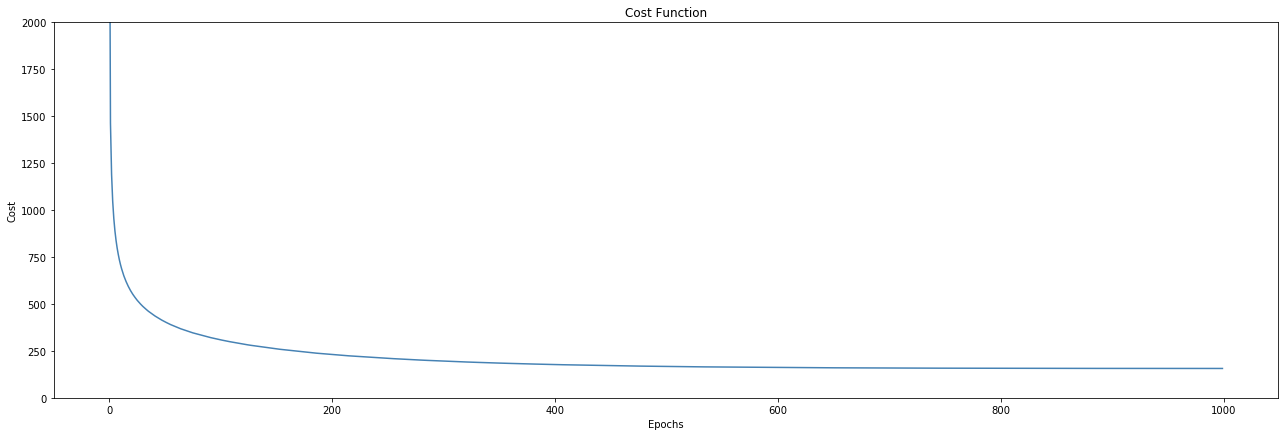

In [25]:
hide_code

batches = np.array_split(range(len(nn2.cost_)), 1000)
cost_ary = np.array(nn2.cost_)
cost_avgs = [np.mean(cost_ary[i]) for i in batches]

plt.figure(figsize=(18,6))
plt.plot(range(len(cost_avgs)), cost_avgs, color='steelblue')
plt.ylim([0, 2000])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.title('Cost Function');

In [26]:
print('Misclassified images: {}'.format(len(test_images[test_labels2 != test_labels_predict])))

Misclassified images: 323


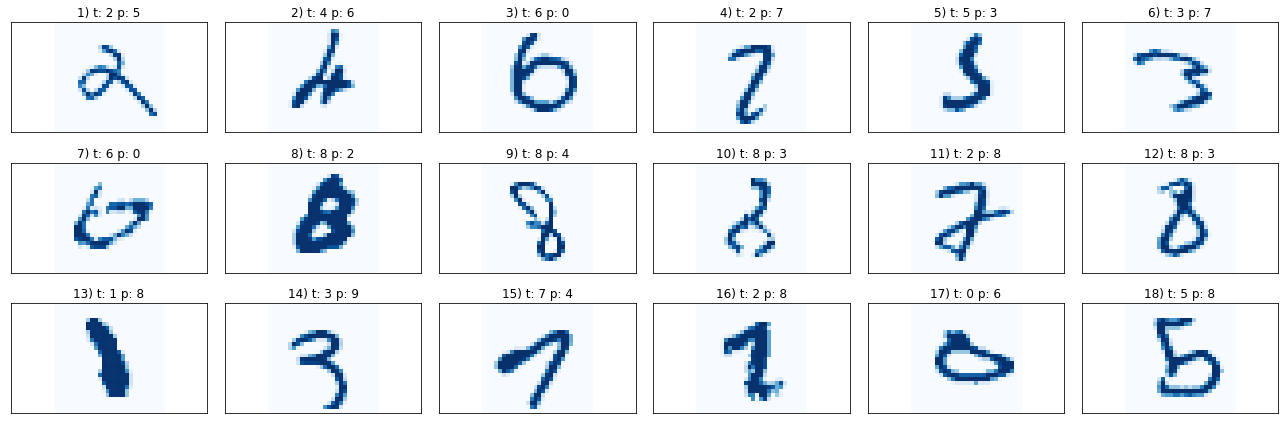

In [27]:
hide_code

miscl_images = test_images[test_labels2 != test_labels_predict][:18]
correct_labels = test_labels2[test_labels2 != test_labels_predict][:18]
miscl_labels = test_labels_predict[test_labels2 != test_labels_predict][:18]

fig, ax = plt.subplots(nrows=3, ncols=6, sharex=True, sharey=True, figsize=(18,6))
ax = ax.flatten()
for i in range(18):
    image = miscl_images[i].reshape(28, 28)
    ax[i].imshow(image, cmap=plt.cm.Blues)
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_labels[i], miscl_labels[i]))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()

#### Model #2. http://cs231n.github.io/neural-networks-case-study/

In [49]:
hide_code

print('Digit dataset. Rows: %d, columns: %d' % (X.shape[0],X.shape[1]))

Digit dataset. Rows: 1797, columns: 64


In [57]:
hide_code

D1 = 64 # dimensionality
K1 = 10 # number of classes
h1 = 500 # size of hidden layer

W11 = 0.001 * np.random.randn(D1, h1)
b11 = np.zeros((1, h1))
W12 = 0.001 * np.random.randn(h1, K1)
b12 = np.zeros((1, K1))

# some hyperparameters
step_size1 = 1e-2
reg1 = 1e-4 # regularization strength

# gradient descent loop
num_examples1 = X.shape[0]

for i in range(2000):
  
    # evaluate class scores
    hidden_layer1 = np.maximum(0, np.dot(X, W11) + b11) # ReLU activation
    scores1 = np.dot(hidden_layer1, W12) + b12
  
    # compute the class probabilities
    exp_scores1 = np.exp(scores1)
    probs1 = exp_scores1 / np.sum(exp_scores1, axis=1, keepdims=True) 
  
    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs1 = -np.log(probs1[range(num_examples1), y])
    data_loss1 = np.sum(corect_logprobs1) / num_examples1
    reg_loss1 = 0.5 * reg1 * np.sum(W11 * W11) + 0.5 * reg1 * np.sum(W12 * W12)
    loss1 = data_loss1 + reg_loss1
    if i % 100 == 0:
        print ("iteration %d: loss %f" % (i, loss1))
  
    # compute the gradient on scores
    dscores1 = probs1
    dscores1[range(num_examples1), y] -= 1
    dscores1 /= num_examples1
  
    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW12 = np.dot(hidden_layer1.T, dscores1)
    db12 = np.sum(dscores1, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden1 = np.dot(dscores1, W12.T)
    # backprop the ReLU non-linearity
    dhidden1[hidden_layer1 <= 0] = 0
    # finally into W,b
    dW11 = np.dot(X.T, dhidden1)
    db11 = np.sum(dhidden1, axis=0, keepdims=True)
  
    # add regularization gradient contribution
    dW12 += reg1 * W12
    dW11 += reg1 * W11
  
    # perform a parameter update
    W11 += -step_size1 * dW11
    b11 += -step_size1 * db11
    W12 += -step_size1 * dW12
    b12 += -step_size1 * db12

iteration 0: loss 2.302513
iteration 100: loss 1.757568
iteration 200: loss 0.530534
iteration 300: loss 0.291664
iteration 400: loss 0.205333
iteration 500: loss 0.162027
iteration 600: loss 0.136052
iteration 700: loss 0.118655
iteration 800: loss 0.106057
iteration 900: loss 0.096394
iteration 1000: loss 0.088644
iteration 1100: loss 0.082218
iteration 1200: loss 0.076740
iteration 1300: loss 0.071983
iteration 1400: loss 0.067777
iteration 1500: loss 0.064011
iteration 1600: loss 0.060610
iteration 1700: loss 0.057522
iteration 1800: loss 0.054695
iteration 1900: loss 0.052098


In [58]:
hide_code

# evaluate training set accuracy
hidden_layer1 = np.maximum(0, np.dot(X, W11) + b11)
scores1 = np.dot(hidden_layer1, W12) + b12
predicted_y = np.argmax(scores1, axis=1)
print ('Digit dataset. Accuracy: %.2f' % (np.mean(predicted_y == y) * 100))

Digit dataset. Accuracy: 99.22


In [59]:
hide_code

print('MNIST. Train dataset. Rows: %d, columns: %d' % (train_images.shape[0], train_images.shape[1]))
print('MNIST. Test dataset. Rows: %d, columns: %d' % (test_images.shape[0], test_images.shape[1]))

MNIST. Train dataset. Rows: 55000, columns: 784
MNIST. Test dataset. Rows: 10000, columns: 784


In [64]:
hide_code

D2 = 784 # dimensionality
K2 = 10 # number of classes
h2 = 112 # size of hidden layer

W21 = 0.001 * np.random.randn(D2, h2)
b21 = np.zeros((1, h2))
W22 = 0.001 * np.random.randn(h2, K2)
b22 = np.zeros((1, K2))

# some hyperparameters
step_size2 = 1e-1
reg2 = 1e-3 # regularization strength

# gradient descent loop
num_examples2 = train_images.shape[0]

for i in range(3000):
  
    # evaluate class scores
    hidden_layer2 = np.maximum(0, np.dot(train_images, W21) + b21) # ReLU activation
    scores2 = np.dot(hidden_layer2, W22) + b22
  
    # compute the class probabilities
    exp_scores2 = np.exp(scores2)
    probs2 = exp_scores2 / np.sum(exp_scores2, axis=1, keepdims=True)
  
    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs2 = -np.log(probs2[range(num_examples2), train_labels2])
    data_loss2 = np.sum(corect_logprobs2) / num_examples2
    reg_loss2 = 0.5 * reg2 * np.sum(W21 * W21) + 0.5 * reg2 * np.sum(W22 * W22)
    loss2 = data_loss2 + reg_loss2
    if i % 100 == 0:
        print ("iteration %d: loss %f" % (i, loss2))
  
    # compute the gradient on scores
    dscores2 = probs2
    dscores2[range(num_examples2), train_labels2] -= 1
    dscores2 /= num_examples2
  
    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW22 = np.dot(hidden_layer2.T, dscores2)
    db22 = np.sum(dscores2, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden2 = np.dot(dscores2, W22.T)
    # backprop the ReLU non-linearity
    dhidden2[hidden_layer2 <= 0] = 0
    # finally into W,b
    dW21 = np.dot(train_images.T, dhidden2)
    db21 = np.sum(dhidden2, axis=0, keepdims=True)
  
    # add regularization gradient contribution
    dW22 += reg2 * W22
    dW21 += reg2 * W21
  
    # perform a parameter update
    W21 += -step_size2 * dW21
    b21 += -step_size2 * db21
    W22 += -step_size2 * dW22
    b22 += -step_size2 * db22   

iteration 0: loss 2.302636
iteration 100: loss 2.063946
iteration 200: loss 0.766694
iteration 300: loss 0.527520
iteration 400: loss 0.446654
iteration 500: loss 0.406136
iteration 600: loss 0.380341
iteration 700: loss 0.361745
iteration 800: loss 0.347386
iteration 900: loss 0.335671
iteration 1000: loss 0.325733
iteration 1100: loss 0.317013
iteration 1200: loss 0.309166
iteration 1300: loss 0.301955
iteration 1400: loss 0.295309
iteration 1500: loss 0.289083
iteration 1600: loss 0.283198
iteration 1700: loss 0.277637
iteration 1800: loss 0.272390
iteration 1900: loss 0.267433
iteration 2000: loss 0.262767
iteration 2100: loss 0.258365
iteration 2200: loss 0.254220
iteration 2300: loss 0.250310
iteration 2400: loss 0.246633
iteration 2500: loss 0.243176
iteration 2600: loss 0.239919
iteration 2700: loss 0.236823
iteration 2800: loss 0.233884
iteration 2900: loss 0.231089


In [66]:
hide_code

# evaluate training set accuracy
hidden_layer2 = np.maximum(0, np.dot(train_images, W21) + b21)
scores2 = np.dot(hidden_layer2, W22) + b22
predicted_train_labels = np.argmax(scores2, axis=1)
print ('MNIST. Train accuracy: %.2f' % (np.mean(predicted_train_labels == train_labels2) * 100))

hidden_layer3 = np.maximum(0, np.dot(test_images, W21) + b21)
scores3 = np.dot(hidden_layer3, W22) + b22
predicted_test_labels = np.argmax(scores3, axis=1)
print ('MNIST. Test accuracy: %.2f' % (np.mean(predicted_test_labels == test_labels2) * 100))

MNIST. Train accuracy: 95.00
MNIST. Test accuracy: 94.81


#### Model #3. Multi-layer Model. TensorFlow

In [113]:
hide_code

image_size = 28
num_labels = 10
batch_size = 256
hidden_nodes = 1024
parameter = 0.0005 
dropout = 0.75

graph = tf.Graph()
with graph.as_default():

    # Input data. For the training data, we use a placeholder that will be fed
    # at run time with a training minibatch.
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_size * image_size))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_test_dataset = tf.constant(test_images)

    # Variables.
    weights1 = tf.Variable(tf.truncated_normal([image_size * image_size, hidden_nodes], stddev=0.05))
    weights2 = tf.Variable(tf.truncated_normal([hidden_nodes, hidden_nodes], stddev=0.05))
    weights3 = tf.Variable(tf.truncated_normal([hidden_nodes, hidden_nodes], stddev=0.05))
    weights4 = tf.Variable(tf.truncated_normal([hidden_nodes, hidden_nodes], stddev=0.05))
    weights5 = tf.Variable(tf.truncated_normal([hidden_nodes, num_labels], stddev=0.05))
    
    biases1 = tf.Variable(tf.constant(0.05, shape=[hidden_nodes]))
    biases2 = tf.Variable(tf.constant(0.05, shape=[hidden_nodes]))
    biases3 = tf.Variable(tf.constant(0.05, shape=[hidden_nodes]))
    biases4 = tf.Variable(tf.constant(0.05, shape=[hidden_nodes]))
    biases5 = tf.Variable(tf.constant(0.05, shape=[num_labels]))
    
    # Training computation with Dropout.   
    
    train_hidden1 = tf.nn.dropout(tf.nn.relu(tf.matmul(tf_train_dataset, weights1) + biases1), dropout)
    train_hidden2 = tf.nn.dropout(tf.nn.relu(tf.matmul(train_hidden1, weights2) + biases2), dropout)
    train_hidden3 = tf.nn.dropout(tf.nn.relu(tf.matmul(train_hidden2, weights3) + biases3), dropout)
    train_hidden4 = tf.nn.dropout(tf.nn.relu(tf.matmul(train_hidden3, weights4) + biases4), dropout)   
    train_logits = tf.matmul(train_hidden4, weights5) + biases5
    
    test_hidden1 = tf.nn.dropout(tf.nn.relu(tf.matmul(tf_test_dataset, weights1) + biases1), dropout)
    test_hidden2 = tf.nn.dropout(tf.nn.relu(tf.matmul(test_hidden1, weights2) + biases2), dropout)
    test_hidden3 = tf.nn.dropout(tf.nn.relu(tf.matmul(test_hidden2, weights3) + biases3), dropout)
    test_hidden4 = tf.nn.dropout(tf.nn.relu(tf.matmul(test_hidden3, weights4) + biases4), dropout)
    test_logits = tf.matmul(test_hidden4, weights5) + biases5
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=train_logits))
    
    # Regularization.
    regularizers = tf.nn.l2_loss(weights1) + tf.nn.l2_loss(biases1) \
    + tf.nn.l2_loss(weights2) + tf.nn.l2_loss(biases2) \
    + tf.nn.l2_loss(weights3) + tf.nn.l2_loss(biases3) \
    + tf.nn.l2_loss(weights4) + tf.nn.l2_loss(biases4) \
    + tf.nn.l2_loss(weights5) + tf.nn.l2_loss(biases5) 
    
    loss += parameter * regularizers    
  
    # Optimizer.
    # Note: altering step size can lead to NaNs in matrices
    optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

    # Predictions for the train and test data.
    train_prediction = tf.nn.softmax(train_logits)    
    test_prediction = tf.nn.softmax(test_logits) 

In [116]:
hide_code

def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)) / predictions.shape[0])

def run_test(num_steps):

    with tf.Session(graph=graph) as session:
        tf.global_variables_initializer().run()
        print("Initialized")
        for step in range(num_steps):
            # Pick an offset within the training data, which has been randomized.
            # Note: we could use better randomization across epochs.
            offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
            # Generate a minibatch.
            batch_data = train_images[offset:(offset + batch_size), :]
            batch_labels = train_labels[offset:(offset + batch_size), :]
            # Prepare a dictionary telling the session where to feed the minibatch.
            # The key of the dictionary is the placeholder node of the graph to be fed,
            # and the value is the numpy array to feed to it.
            feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
            _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
            if (step % 300 == 0):
                print("Minibatch loss at step %d: %f" % (step, l))
                print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
        print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))

In [117]:
hide_code

run_test(3001)

Initialized
Minibatch loss at step 0: 4.609770
Minibatch accuracy: 8.6%
Minibatch loss at step 300: 2.277668
Minibatch accuracy: 88.7%
Minibatch loss at step 600: 2.120021
Minibatch accuracy: 91.0%
Minibatch loss at step 900: 2.086948
Minibatch accuracy: 94.1%
Minibatch loss at step 1200: 2.038336
Minibatch accuracy: 93.4%
Minibatch loss at step 1500: 1.917827
Minibatch accuracy: 96.9%
Minibatch loss at step 1800: 1.809130
Minibatch accuracy: 99.2%
Minibatch loss at step 2100: 1.815230
Minibatch accuracy: 98.0%
Minibatch loss at step 2400: 1.764551
Minibatch accuracy: 98.4%
Minibatch loss at step 2700: 1.840882
Minibatch accuracy: 95.7%
Minibatch loss at step 3000: 1.728817
Minibatch accuracy: 97.7%
Test accuracy: 96.3%


#### Model #4. Multi-layer Perceptron. Keras

In [67]:
hide_code

ks.backend.backend()

'tensorflow'

In [123]:
hide_code

mlp_model = Sequential()

mlp_model.add(Dense(128, activation='relu', input_dim=784))
mlp_model.add(Dropout(0.5))

mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dropout(0.5))

mlp_model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

mlp_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

mlp_model.fit(train_images, train_labels, epochs=20, batch_size=128);

Epoch 1/20
55000/55000 [==============================] - 22s - loss: 0.9739 - acc: 0.6815    
Epoch 2/20
55000/55000 [==============================] - 3s - loss: 0.4938 - acc: 0.8537     
Epoch 3/20
55000/55000 [==============================] - 3s - loss: 0.3982 - acc: 0.8837     
Epoch 4/20
55000/55000 [==============================] - 3s - loss: 0.3511 - acc: 0.9010     
Epoch 5/20
55000/55000 [==============================] - 3s - loss: 0.3168 - acc: 0.9098     
Epoch 6/20
55000/55000 [==============================] - 3s - loss: 0.2938 - acc: 0.9178     
Epoch 7/20
55000/55000 [==============================] - 3s - loss: 0.2784 - acc: 0.9223     
Epoch 8/20
55000/55000 [==============================] - 4s - loss: 0.2573 - acc: 0.9275     
Epoch 9/20
55000/55000 [==============================] - 4s - loss: 0.2481 - acc: 0.9308     
Epoch 10/20
55000/55000 [==============================] - 4s - loss: 0.2361 - acc: 0.9340     
Epoch 11/20
55000/55000 [========================

In [124]:
hide_code

mlp_scores = mlp_model.evaluate(test_images, test_labels)
print("\nMLP Scores: ", (mlp_scores))
print("MLP Error: %.2f%%" % (100 - mlp_scores[1] * 100))
print(mlp_model.summary())

 9984/10000 [============================>.] - ETA: 0s
MLP Scores:  [0.10365629611033947, 0.97050000000000003]
MLP Error: 2.95%
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
None


#### Model #5. Convolutional Neural Network. Keras

In [129]:
hide_code

ks.backend.set_image_dim_ordering('th')

In [130]:
hide_code

def cnn_model1():
    model = Sequential()
    
    model.add(Conv2D(28, (7, 7), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(14, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.2))
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [131]:
hide_code

cnn_model11 = cnn_model1()

cnn_model11.fit(train_images_n28, train_labels, 
                validation_data=(test_images_n28, test_labels), 
                epochs=10, batch_size=100);

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 178s - loss: 0.3207 - acc: 0.8996 - val_loss: 0.0688 - val_acc: 0.9780
Epoch 2/10
55000/55000 [==============================] - 170s - loss: 0.0982 - acc: 0.9698 - val_loss: 0.0517 - val_acc: 0.9822
Epoch 3/10
55000/55000 [==============================] - 173s - loss: 0.0705 - acc: 0.9781 - val_loss: 0.0425 - val_acc: 0.9856
Epoch 4/10
55000/55000 [==============================] - 164s - loss: 0.0596 - acc: 0.9811 - val_loss: 0.0341 - val_acc: 0.9890
Epoch 5/10
55000/55000 [==============================] - 170s - loss: 0.0517 - acc: 0.9838 - val_loss: 0.0329 - val_acc: 0.9896
Epoch 6/10
55000/55000 [==============================] - 166s - loss: 0.0456 - acc: 0.9852 - val_loss: 0.0285 - val_acc: 0.9911
Epoch 7/10
55000/55000 [==============================] - 175s - loss: 0.0411 - acc: 0.9867 - val_loss: 0.0252 - val_acc: 0.9919
Epoch 8/10
55000/55000 [=======================

In [132]:
hide_code

cnn_scores1 = cnn_model11.evaluate(test_images_n28, test_labels, verbose=0)

print("Model 5.1. CNN Scores: " , (cnn_scores1))
print("Model 5.1. CNN Error: %.2f%%" % (100 - cnn_scores1[1]*100))
print(cnn_model11.summary())

Model 5.1. CNN Scores:  [0.023566197849460877, 0.99199999999999999]
Model 5.1. CNN Error: 0.80%
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 22, 22)        1400      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 28, 11, 11)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 9, 9)          3542      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 4, 4)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 14, 4, 4)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 224)               0         
______________________________________________

In [120]:
hide_code

def cnn_model2():
    model = Sequential()
    
    model.add(Conv2D(128, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.2))
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [121]:
hide_code

cnn_model12 = cnn_model2()

cnn_model12.fit(train_images_n28, train_labels, 
              validation_data=(test_images_n28, test_labels), 
              epochs=10, batch_size=128)

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 826s - loss: 0.2008 - acc: 0.9385 - val_loss: 0.0453 - val_acc: 0.9860
Epoch 2/10
55000/55000 [==============================] - 810s - loss: 0.0557 - acc: 0.9831 - val_loss: 0.0339 - val_acc: 0.9889
Epoch 3/10
55000/55000 [==============================] - 757s - loss: 0.0404 - acc: 0.9874 - val_loss: 0.0304 - val_acc: 0.9899
Epoch 4/10
55000/55000 [==============================] - 815s - loss: 0.0323 - acc: 0.9895 - val_loss: 0.0236 - val_acc: 0.9926
Epoch 5/10
55000/55000 [==============================] - 791s - loss: 0.0249 - acc: 0.9921 - val_loss: 0.0255 - val_acc: 0.9911
Epoch 6/10
55000/55000 [==============================] - 829s - loss: 0.0217 - acc: 0.9929 - val_loss: 0.0265 - val_acc: 0.9913
Epoch 7/10
55000/55000 [==============================] - 866s - loss: 0.0189 - acc: 0.9941 - val_loss: 0.0265 - val_acc: 0.9919
Epoch 8/10
55000/55000 [=======================

In [122]:
cnn_scores2 = cnn_model12.evaluate(test_images_n28, test_labels, verbose=0)

print("Model 5.2. CNN Scores: " , (cnn_scores2))
print("Model 5.2. CNN Error: %.2f%%" % (100 - cnn_scores2[1]*100))
print(cnn_model12.summary())

Model 5.2. CNN Scores:  [0.025999592774480697, 0.99199999999999999]
Model 5.2. CNN Error: 0.80%
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 128, 24, 24)       3328      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 128, 12, 12)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 10, 10)        73792     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 5, 5)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 64, 5, 5)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
______________________________________________

In [126]:
hide_code

def cnn_model3():
    model = Sequential()
    
    model.add(Conv2D(56, (7, 7), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(28, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(0.1))
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [127]:
hide_code

cnn_model13 = cnn_model3()

cnn_model13.fit(train_images_n28, train_labels, 
              validation_data=(test_images_n28, test_labels), 
              epochs=10, batch_size=128);

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 310s - loss: 0.2894 - acc: 0.9073 - val_loss: 0.0796 - val_acc: 0.9757
Epoch 2/10
55000/55000 [==============================] - 304s - loss: 0.0774 - acc: 0.9753 - val_loss: 0.0442 - val_acc: 0.9855
Epoch 3/10
55000/55000 [==============================] - 299s - loss: 0.0535 - acc: 0.9830 - val_loss: 0.0424 - val_acc: 0.9864
Epoch 4/10
55000/55000 [==============================] - 298s - loss: 0.0428 - acc: 0.9869 - val_loss: 0.0333 - val_acc: 0.9891
Epoch 5/10
55000/55000 [==============================] - 295s - loss: 0.0352 - acc: 0.9887 - val_loss: 0.0274 - val_acc: 0.9905
Epoch 6/10
55000/55000 [==============================] - 296s - loss: 0.0296 - acc: 0.9906 - val_loss: 0.0354 - val_acc: 0.9885
Epoch 7/10
55000/55000 [==============================] - 291s - loss: 0.0268 - acc: 0.9919 - val_loss: 0.0262 - val_acc: 0.9911
Epoch 8/10
55000/55000 [=======================

In [128]:
cnn_scores3 = cnn_model13.evaluate(test_images_n28, test_labels, verbose=0)

print("Model 5.3. CNN Scores: " , (cnn_scores3))
print("Model 5.3. CNN Error: %.2f%%" % (100 - cnn_scores3[1]*100))
print(cnn_model13.summary())

Model 5.3. CNN Scores:  [0.028982271286641118, 0.99209999999999998]
Model 5.3. CNN Error: 0.79%
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 56, 22, 22)        2800      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 56, 11, 11)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 9, 9)          14140     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 28, 4, 4)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 28, 4, 4)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 448)               0         
______________________________________________

#### Model #6. MLPClassifier. Scikit-learn

In [27]:
hide_code

clf1 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=70, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
clf1.fit(train_images, train_labels);

Iteration 1, loss = 0.60156824
Iteration 2, loss = 0.27297370
Iteration 3, loss = 0.20647665
Iteration 4, loss = 0.17051029
Iteration 5, loss = 0.14766734
Iteration 6, loss = 0.13066736
Iteration 7, loss = 0.11707463
Iteration 8, loss = 0.10379596
Iteration 9, loss = 0.09576563
Iteration 10, loss = 0.08580545
Iteration 11, loss = 0.07876979
Iteration 12, loss = 0.07143936
Iteration 13, loss = 0.06422787
Iteration 14, loss = 0.05865670
Iteration 15, loss = 0.05444742
Iteration 16, loss = 0.05104569
Iteration 17, loss = 0.04502452
Iteration 18, loss = 0.04091311
Iteration 19, loss = 0.03783826
Iteration 20, loss = 0.03472363
Iteration 21, loss = 0.03240190
Iteration 22, loss = 0.02882075
Iteration 23, loss = 0.02590460
Iteration 24, loss = 0.02426535
Iteration 25, loss = 0.02127423
Iteration 26, loss = 0.01985075
Iteration 27, loss = 0.01848932
Iteration 28, loss = 0.01739222
Iteration 29, loss = 0.01442560
Iteration 30, loss = 0.01318563
Iteration 31, loss = 0.01165906
Iteration 32, los

In [30]:
train_predict1 = clf1.predict(train_images)
test_predict1 = clf1.predict(test_images)
print("MNIST. MLPClassifier. Train score: %f" % clf1.score(train_images, train_labels))
print("MNIST. MLPClassifier. Test score: %f" % clf1.score(test_images, test_labels))

MNIST. MLPClassifier. Train score: 1.000000
MNIST. MLPClassifier. Test score: 0.955200


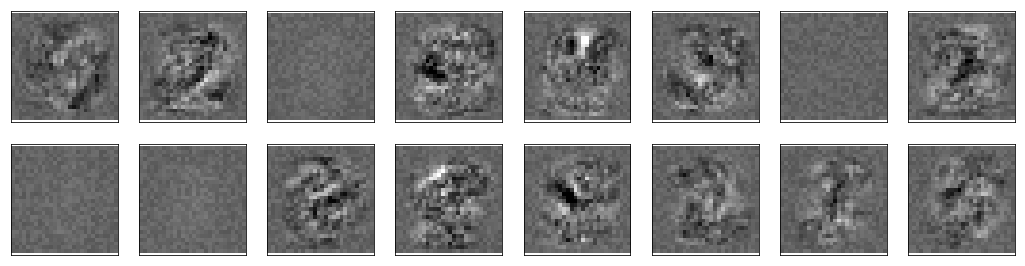

In [68]:
hide_code

# Visualization of MLPClassifier weights on MNIST
fig, axes = plt.subplots(nrows=2, ncols=8, sharex=True, sharey=True, figsize=(18, 4.5))

vmin, vmax = clf1.coefs_[0].min(), clf1.coefs_[0].max()
for coef, ax in zip(clf1.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.binary, vmin=0.6*vmin, vmax=0.6*vmax)
    ax.set_xticks(())
    ax.set_yticks(())

In [52]:
clf2 = MLPClassifier(hidden_layer_sizes=(150,), max_iter=20, alpha=1e-5,
                    solver='adam', verbose=10, tol=1e-5, random_state=1,
                    learning_rate_init=.01)
clf2.fit(train_images, train_labels);

Iteration 1, loss = 0.56711763
Iteration 2, loss = 0.24278367
Iteration 3, loss = 0.19203708
Iteration 4, loss = 0.15520479
Iteration 5, loss = 0.13367705
Iteration 6, loss = 0.11569477
Iteration 7, loss = 0.10584244
Iteration 8, loss = 0.09487140
Iteration 9, loss = 0.09082862
Iteration 10, loss = 0.08086343
Iteration 11, loss = 0.06900338
Iteration 12, loss = 0.06925387
Iteration 13, loss = 0.06813594
Iteration 14, loss = 0.06480021
Iteration 15, loss = 0.06303774
Iteration 16, loss = 0.04984380
Iteration 17, loss = 0.05158701
Iteration 18, loss = 0.06045313
Iteration 19, loss = 0.05337105
Training loss did not improve more than tol=0.000010 for two consecutive epochs. Stopping.


In [53]:
train_predict2 = clf2.predict(train_images)
test_predict2 = clf2.predict(test_images)
print("MNIST. MLPClassifier. Train score: %f" % clf2.score(train_images, train_labels))
print("MNIST. MLPClassifier. Test score: %f" % clf2.score(test_images, test_labels))

MNIST. MLPClassifier. Train score: 0.989327
MNIST. MLPClassifier. Test score: 0.959100


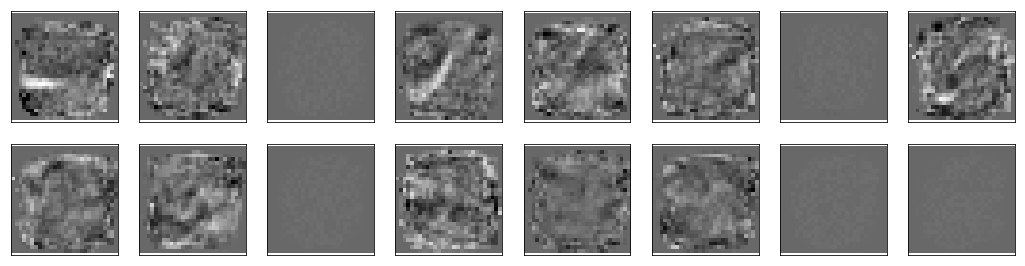

In [72]:
hide_code

# Visualization of MLPClassifier weights on MNIST
fig, axes = plt.subplots(nrows=2, ncols=8, sharex=True, sharey=True, figsize=(18, 4.5))

vmin, vmax = clf2.coefs_[0].min(), clf2.coefs_[0].max()
for coef, ax in zip(clf2.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.binary, vmin=0.6*vmin, vmax=0.6*vmax)
    ax.set_xticks(())
    ax.set_yticks(())

### Question 1
_What approach did you take in coming up with a solution to this problem?_
### Answer 1
### Question 2
_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)_
### Answer 2
### Question 3
_How did you train your model? How did you generate your synthetic dataset?_ Include examples of images from the synthetic data you constructed.
### Answer 3


----
## $\mathfrak {\color{#348ABD} {Step \ 2:\ Train \ a \ Model \ on \ a \ Realistic \ Dataset}}$
Once we have settled on a good architecture, we can train the model on real data. In particular, the [Street View House Numbers (SVHN)](http://ufldl.stanford.edu/housenumbers/) dataset is a good large-scale dataset collected from house numbers in Google Street View. Training on this more challenging dataset, where the digits are not neatly lined-up and have various skews, fonts and colors, likely means you have to do some hyperparameter exploration to perform well.

### Implementation
Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [26]:
hide_code
# Model training

''

### Question 4
_Describe how you set up the training and testing data for your model. How does the model perform on a realistic dataset?_
### Answer 4

### Question 5
_What changes did you have to make, if any, to achieve "good" results? Were there any options you explored that made the results worse?_
### Answer 5

### Question 6
_What were your initial and final results with testing on a realistic dataset? Do you believe your model is doing a good enough job at classifying numbers correctly?_
### Answer 6

----
## $\mathfrak {\color{#348ABD} {Step \ 3: \ Test \ a \ Model \ on \ Newly-Captured \ Images}}$

Take several pictures of numbers that you find around you (at least five), and run them through your classifier on your computer to produce example results. Alternatively (optionally), you can try using OpenCV / SimpleCV / Pygame to capture live images from a webcam and run those through your classifier.

In [27]:
hide_code
# Model testing

''

### Question 7
_Choose five candidate images of numbers you took from around you and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult?_

### Answer 7

### Question 8
_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the realistic dataset?_

### Answer 8

### Optional: Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._

### Answer 9

----
## $\mathfrak {\color{#348ABD} {Step \ 4: \ Explore \ an \ Improvement \ for \ a \ Model}}$

There are many things you can do once you have the basic classifier in place. One example would be to also localize where the numbers are on the image. The SVHN dataset provides bounding boxes that you can tune to train a localizer. Train a regression loss to the coordinates of the bounding box, and then test it. 

In [ ]:
hide_code
# 

In [ ]:
hide_code
#


### Question 10
_How well does your model localize numbers on the testing set from the realistic dataset? Do your classification results change at all with localization included?_
### Answer 10

### Question 11
_Test the localization function on the images you captured in **Step 3**. Does the model accurately calculate a bounding box for the numbers in the images you found? If you did not use a graphical interface, you may need to investigate the bounding boxes by hand._ Provide an example of the localization created on a captured image.

### Answer 11

----
## $\mathfrak {\color{#348ABD} {Optional \ Step \ 5: \ Build \ an \ Application \ or \ Program \ for \ a \ Model}}$
Take your project one step further. If you're interested, look to build an Android application or even a more robust Python program that can interface with input images and display the classified numbers and even the bounding boxes. You can for example try to build an augmented reality app by overlaying your answer on the image like the [Word Lens](https://en.wikipedia.org/wiki/Word_Lens) app does.

Loading a TensorFlow model into a camera app on Android is demonstrated in the [TensorFlow Android demo app](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/android), which you can simply modify.

If you decide to explore this optional route, be sure to document your interface and implementation, along with significant results you find. You can see the additional rubric items that you could be evaluated on by [following this link](https://review.udacity.com/#!/rubrics/413/view).

### Documentation
Provide additional documentation sufficient for detailing the implementation of the Android application or Python program for visualizing the classification of numbers in images. It should be clear how the program or application works. Demonstrations should be provided. 